# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/21f_made/homeworks/Lab1_ML_pipeline_and_SVM/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,764,103,53,106,172,55,10,212,32,24,168,220,660,223,73,16,24,187,197
1,834,82,36,51,114,53,4,135,50,18,126,150,268,144,86,15,4,181,182
2,338,97,45,91,161,63,10,151,45,19,148,166,334,171,65,18,20,197,205
3,784,87,37,52,116,54,6,115,58,17,126,135,196,144,74,11,22,186,190
4,279,94,37,73,186,71,7,154,42,19,127,171,362,132,67,2,8,197,206
5,156,85,36,78,149,55,7,147,45,19,128,168,321,134,64,10,24,197,203
6,702,96,48,83,177,59,8,171,39,21,152,195,438,196,67,15,0,195,201
7,823,105,54,105,213,67,10,200,33,23,163,214,597,214,68,10,20,190,198
8,552,90,39,89,181,62,8,175,38,21,132,200,458,154,70,11,15,189,195
9,829,95,49,82,139,56,11,159,43,20,162,173,365,185,75,7,10,182,191


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,423.970856,93.444444,44.899818,81.981785,168.315118,61.510018,8.471767,168.965392,40.848816,20.584699,148.018215,188.500911,440.324226,174.717668,72.484517,6.320583,12.391621,188.837887,195.488160
std,246.024869,8.176827,6.225315,15.492865,32.731279,7.134423,4.237651,33.062216,7.646436,2.591153,14.685997,30.805584,176.776728,32.348954,7.064499,4.821935,8.993591,6.222541,7.437719
min,1.000000,73.000000,33.000000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,216.000000,87.000000,40.000000,70.000000,141.000000,57.000000,6.000000,147.000000,33.000000,19.000000,137.000000,168.000000,320.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.000000
50%,431.000000,92.000000,44.000000,79.000000,166.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,365.000000,174.000000,72.000000,6.000000,11.000000,188.000000,196.000000
75%,631.000000,100.000000,49.000000,98.000000,194.000000,65.000000,10.000000,198.000000,46.000000,23.000000,160.000000,216.000000,587.000000,197.000000,76.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,322.000000,133.000000,55.000000,265.000000,61.000000,29.000000,186.000000,287.000000,1018.000000,262.000000,127.000000,22.000000,41.000000,204.000000,210.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

---

#### My code

Первым делом попробую понять есть ли в данных категориальные фичи. Для этого посчитаю количество уникальных значений в каждой колонке.

In [6]:
for column in X_train_pd.columns:
    unique_count = len(X_train_pd[column].unique())
    print('Unique values in {}: {} ({:0.0f}%)'.format(column, unique_count, unique_count / X_train_pd.shape[0] * 100))

Unique values in 0: 549 (100%)
Unique values in 1: 42 (8%)
Unique values in 2: 27 (5%)
Unique values in 3: 61 (11%)
Unique values in 4: 128 (23%)
Unique values in 5: 34 (6%)
Unique values in 6: 17 (3%)
Unique values in 7: 122 (22%)
Unique values in 8: 35 (6%)
Unique values in 9: 13 (2%)
Unique values in 10: 65 (12%)
Unique values in 11: 116 (21%)
Unique values in 12: 329 (60%)
Unique values in 13: 130 (24%)
Unique values in 14: 35 (6%)
Unique values in 15: 23 (4%)
Unique values in 16: 39 (7%)
Unique values in 17: 29 (5%)
Unique values in 18: 30 (5%)


Т.к. о природе данных ничего не известно сложно делать однозначный вывод. Учитывая, что все данные - целые числа, можно было бы предположить, что фичи с наименьшим количеством уникальных значений являются категориальными с большим числом различных классов.

In [7]:
# Lable Encoding

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(target)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

Далее, стандартное шкалирование, т.к. на данный момент все величины имеют разный разброс и среднее. Это может плохо сказаться на качестве линейной модели.

In [8]:
from sklearn.preprocessing import StandardScaler

standart_scaler = StandardScaler()
X_train_standart_scaled = standart_scaler.fit_transform(X_train)
X_test_standart_scaled = standart_scaler.transform(X_test)

In [9]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
minmax_scaler.fit(data)
X_train_minmax_scaled = minmax_scaler.transform(X_train)
X_test_minmax_scaled = minmax_scaler.transform(X_test)
print(f'Minmax scaled train shape: {X_train_minmax_scaled.shape}')
print(f'Minmax scaled test shape: {X_test_minmax_scaled.shape}')

Minmax scaled train shape: (549, 19)
Minmax scaled test shape: (297, 19)


#### End of my code

---

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

---

My code

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.base import BaseEstimator

def one_vs_all_score(y_pred: list, y_true: list) -> tuple:
    '''Mean f1 score for multiclass classification based on one-vs-all strategy'''
    labels = list(range(len(label_encoder.classes_)))
    # f1_scores = [ f1_score(y_pred == i, y_true == i) for i in labels ]
    accuracy_scores = [ accuracy_score(y_true == i, y_pred == i) for i in labels ]
    # current_f1_score = np.mean(f1_scores)
    current_f1_score = f1_score(y_true, y_pred, average='macro')
    current_accuracy_score = np.mean(accuracy_scores)
    return current_f1_score, current_accuracy_score

def cross_val_param_tune(model_class: BaseEstimator, grid_params: list, model_params: dict, grid_param_name: str,  \
                         X_train: np.array, X_test: np.array, verbose: bool = True) -> float:
    '''Crossval best model param search'''
    model_f1_scores = []
    model_accuracy_scores = []
    skf = StratifiedKFold(
        n_splits=5,
        shuffle=True,
        random_state=42,
    )

    for l1_ratio in grid_params:
        model_params[grid_param_name] = l1_ratio
        model = model_class(**model_params)
        k_fold_f1_scores = []
        k_fold_accuracy_scores = []

        for train_ids, test_ids in skf.split(X_train, y_train):
            k_X_train, k_X_test = X_train[train_ids], X_train[test_ids]
            k_y_train, k_y_test = y_train[train_ids], y_train[test_ids]
            model.fit(k_X_train, k_y_train)
            k_y_pred = model.predict(k_X_test)
            mean_f1, mean_accuracy = one_vs_all_score(k_y_pred, k_y_test)
            k_fold_f1_scores.append(mean_f1)
            k_fold_accuracy_scores.append(mean_accuracy)

        model_f1_scores.append(np.mean(k_fold_f1_scores))
        model_accuracy_scores.append(np.mean(k_fold_accuracy_scores))
        
    if verbose:
        for l1_ratio, mean_f1, mean_accuracy in zip(grid_params, model_f1_scores, model_accuracy_scores):
            print(f'{grid_param_name}: {l1_ratio}')
            print('\tF1 score: {:0.5}'.format(mean_f1))
            print('\tAccuracy score: {:0.5}'.format(mean_accuracy))

    best_f1_ids = np.argmax(model_f1_scores)
    best_accuracy_ids = np.argmax(model_accuracy_scores)
    best_l1_ratio = grid_params[best_f1_ids]
    
    if verbose:
        print(f'Best F1 index: {best_f1_ids}')
        print(f'Best Accuracy index: {best_accuracy_ids}')
        print(f'Best {grid_param_name}: {best_l1_ratio}')

    return best_l1_ratio

In [11]:
grid_params = [0, 0.2, 0.5, 0.8, 1]
model_params = {
        'multi_class': 'multinomial',
        'solver': 'saga',
        'tol': 1e-3,
        'max_iter': 500,
        'penalty': 'elasticnet',
        'l1_ratio': None,
        'verbose': False,
        'random_state': 42,
    }
best_l1_ratio = cross_val_param_tune(LogisticRegression, grid_params, model_params, 'l1_ratio', X_train_standart_scaled, X_test_standart_scaled)

l1_ratio: 0
	F1 score: 0.76499
	Accuracy score: 0.8843
l1_ratio: 0.2
	F1 score: 0.76554
	Accuracy score: 0.8843
l1_ratio: 0.5
	F1 score: 0.76259
	Accuracy score: 0.88248
l1_ratio: 0.8
	F1 score: 0.76491
	Accuracy score: 0.88339
l1_ratio: 1
	F1 score: 0.76808
	Accuracy score: 0.88522
Best F1 index: 4
Best Accuracy index: 4
Best l1_ratio: 1


In [12]:
best_logreg_params = {
    'multi_class': 'multinomial',
    'solver': 'saga',
    'tol': 1e-3,
    'max_iter': 500,
    'penalty': 'elasticnet',
    'l1_ratio': best_l1_ratio,
    'verbose': False,
    'random_state': 42,
}

logreg_model = LogisticRegression(**best_logreg_params)
logreg_model.fit(X_train_standart_scaled, y_train)
y_pred = logreg_model.predict(X_test_standart_scaled)
mean_f1, mean_accuracy = one_vs_all_score(y_pred, y_test)

print('F1 score: {:0.5}'.format(mean_f1))
print('Accuracy score: {:0.5}'.format(mean_accuracy))

F1 score: 0.83085
Accuracy score: 0.91414


In [13]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

---

#### My Code

Выбирать количество признаков будем так, чтобы они объясняли 99% variance.

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

target_variance = 0.99

pca_params = {
    'random_state': 42,
    'n_components': target_variance,
}

pca = PCA(**pca_params)
pca.fit(X_train_minmax_scaled)
print(f'Recomended number of components: {pca.n_components_}')

Recomended number of components: 11


Как видно из вывода выше, для этого необходимо сократить размерность до 11.
Попробуем также сделать аналогичные выводы из графика, построенного на основе pca.explained_variance_ratio_:

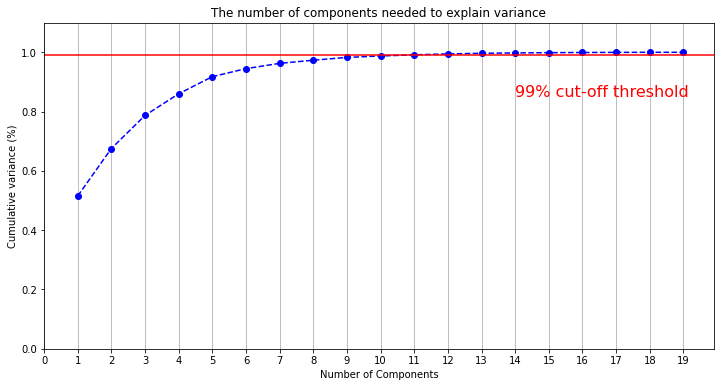

In [15]:
target_variance = 0.99

pca_params = {
    'random_state': 42,
}

pca = PCA(**pca_params)
pca.fit(X_train_minmax_scaled)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, X_train.shape[1] + 1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, X_train.shape[1] + 1, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=target_variance, color='r', linestyle='-')
plt.text(14, 0.85, f'{int(target_variance * 100)}% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

Код для построения графика выше взят из статьи https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/

Как видно из графика выше, для объяснения 99% variance, достаточно сократить размерность данных до 11.
Этот результат следует как из графика выше, так и из результата автоматического подбора необходимого количества параметров в PCA (см.выше).

Итак, оптимальное количество элементов: 11

#### End of my code

---

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

---

#### My code

Для обучения PCA будем использовать данные преобразованные так, что диапазон всех признаков равен [0;1], т.к. именно такие данные необходимо передавать в PCA.

In [16]:
pca_params = {
    'random_state': 42,
    'n_components': 11,
}

pca = PCA(**pca_params)
pca_X_train = pca.fit_transform(X_train_minmax_scaled)
pca_X_test = pca.transform(X_test_minmax_scaled)
print(f'PCA train shape: {pca_X_train.shape}')
print(f'PCA test shape: {pca_X_test.shape}')

PCA train shape: (549, 11)
PCA test shape: (297, 11)


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

---

#### My code

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def create_pipe_with_logreg_param(**params: float) -> Pipeline:
    '''Create Pipeline with LogReg for given l1_ratio'''
    logreg_pipe = Pipeline(
        steps=[
            (
                'Minmax_scaler',
                MinMaxScaler(),
            ),
            (
                'PCA',
                PCA(
                    n_components=11,
                    random_state=42,
                ),
            ),
            (
                'StandartScaler',
                StandardScaler(),
            ),
            (
                'Model',
                LogisticRegression(**params),
            ),
        ],
        verbose=False,
    )
    
    return logreg_pipe

In [18]:
grid_params = [0, 0.2, 0.5, 0.8, 1]
model_params = {
    'multi_class': 'multinomial',
    'solver': 'saga',
    'tol': 1e-3,
    'max_iter': 500,
    'penalty': 'elasticnet',
    'l1_ratio': None,
    'verbose': False,
    'random_state': 42,
}
best_l1_ratio = cross_val_param_tune(create_pipe_with_logreg_param, grid_params, model_params, 'l1_ratio', X_train, X_test)

l1_ratio: 0
	F1 score: 0.70069
	Accuracy score: 0.85515
l1_ratio: 0.2
	F1 score: 0.70069
	Accuracy score: 0.85515
l1_ratio: 0.5
	F1 score: 0.69963
	Accuracy score: 0.85425
l1_ratio: 0.8
	F1 score: 0.69372
	Accuracy score: 0.85152
l1_ratio: 1
	F1 score: 0.69641
	Accuracy score: 0.85243
Best F1 index: 0
Best Accuracy index: 0
Best l1_ratio: 0


In [19]:
best_logreg_params = {
    'multi_class': 'multinomial',
    'solver': 'saga',
    'tol': 1e-3,
    'max_iter': 500,
    'penalty': 'elasticnet',
    'l1_ratio': best_l1_ratio,
    'verbose': False,
    'random_state': 42,
}

logreg_pipe = create_pipe_with_logreg_param(**best_logreg_params)
logreg_pipe.fit(X_train, y_train)
y_pred = logreg_pipe.predict(X_test)
y_pred_proba = logreg_pipe.predict_proba(X_test)
mena_f1, mean_accuracy = one_vs_all_score(y_pred, y_test)

print('F1 score: {:0.5}'.format(mean_f1))
print('Accuracy score: {:0.5}'.format(mean_accuracy))

F1 score: 0.83085
Accuracy score: 0.867


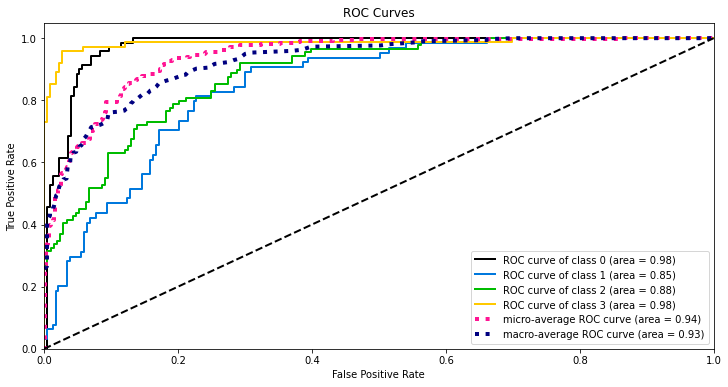

In [20]:
from scikitplot.metrics import plot_roc

plot_roc(y_test, y_pred_proba)
plt.show()

#### End of my code

---

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

---

#### My code

In [21]:
from sklearn.tree import DecisionTreeClassifier

def create_pipe_with_tree_param(**params: float) -> Pipeline:
    '''Create Pipeline with Tree for given params'''
    tree_pipe = Pipeline(
        steps=[
            (
                'Minmax_scaler',
                MinMaxScaler(),
            ),
            (
                'PCA',
                PCA(
                    n_components=11,
                    random_state=42,
                ),
            ),
            (
                'StandartScaler',
                StandardScaler(),
            ),
            (
                'Model',
                DecisionTreeClassifier(**params),
            ),
        ],
        verbose=False,
    )
    
    return tree_pipe

In [22]:
tree_grid_params = [1, 5, 10, 15, None]
tree_params = {
    'random_state': 42,
}
best_depth = cross_val_param_tune(create_pipe_with_tree_param, tree_grid_params, tree_params, 'max_depth', X_train, X_test)

max_depth: 1
	F1 score: 0.25036
	Accuracy score: 0.68943
max_depth: 5
	F1 score: 0.58881
	Accuracy score: 0.80144
max_depth: 10
	F1 score: 0.62242
	Accuracy score: 0.81143
max_depth: 15
	F1 score: 0.62333
	Accuracy score: 0.81233
max_depth: None
	F1 score: 0.62333
	Accuracy score: 0.81233
Best F1 index: 3
Best Accuracy index: 3
Best max_depth: 15


In [23]:
tree_params = {
    'random_state': 42,
    'max_depth': best_depth,
}
tree_model = DecisionTreeClassifier(**tree_params)
tree_model.fit(X_train, y_train)
tree_y_pred = tree_model.predict(X_test)
mean_f1, mean_accuracy = one_vs_all_score(tree_y_pred, y_test)

print('F1 score on test: {:0.5}'.format(mean_f1))
print('Accuracy score on test: {:0.5}'.format(mean_accuracy))

F1 score on test: 0.68458
Accuracy score on test: 0.83838


#### End of my code

---

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

---

#### My code

In [24]:
N_MIN = 2
N_MAX = 100
STEP = 5

n_grid_param = list(range(N_MIN, N_MAX + 1, STEP))

In [25]:
from sklearn.ensemble import BaggingClassifier

tree_optimal_params = {
    'random_state': 42,
    'max_depth': best_depth,
}
logreg_optimal_params = {
    'multi_class': 'multinomial',
    'solver': 'saga',
    'tol': 1e-3,
    'max_iter': 500,
    'penalty': 'elasticnet',
    'l1_ratio': best_l1_ratio,
    'verbose': False,
    'random_state': 42,
}

logreg_bagging_model = BaggingClassifier(
    base_estimator=create_pipe_with_logreg_param(**logreg_optimal_params),
    n_estimators=N_MAX,
    bootstrap=True,
    random_state=42,
)
tree_bagging_model = BaggingClassifier(
    base_estimator=create_pipe_with_tree_param(**tree_optimal_params),
    n_estimators=N_MAX,
    bootstrap=True,
    random_state=42,
)
logreg_bagging_model.fit(X_train, y_train)
tree_bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=Pipeline(steps=[('Minmax_scaler',
                                                  MinMaxScaler()),
                                                 ('PCA',
                                                  PCA(n_components=11,
                                                      random_state=42)),
                                                 ('StandartScaler',
                                                  StandardScaler()),
                                                 ('Model',
                                                  DecisionTreeClassifier(max_depth=15,
                                                                         random_state=42))]),
                  n_estimators=100, random_state=42)

In [26]:
import random
random.seed(42)

def bagging_models_proba_predictions(bagging_model: BaggingClassifier, test_data: np.array) -> list:
    '''Get all estimators predictions'''
    model_pred_probas = []
    
    for model in bagging_model.estimators_:
        model_pred_probas.append(model.predict_proba(test_data))
        
    return model_pred_probas

def get_random_k_predictions(all_proba_predictions: np.array, k: int) -> np.array:
    '''Get k random selected models predictions'''
    model_ids = random.sample(list(range(N_MAX)), k=k)
    k_proba_predictions = np.stack([all_proba_predictions[i] for i in model_ids], axis=2)
    return k_proba_predictions.mean(axis=2).argmax(axis=1)

def plot_f1_and_accuracy(n_grid_param: np.array, model_f1_scores: list, model_accuracy_scores: list, model_name: str, figsize: tuple = (10, 5)):
    plt.figure(figsize=figsize)
    plt.plot(n_grid_param, model_f1_scores)
    plt.plot(n_grid_param, model_accuracy_scores)
    plt.xticks(n_grid_param)
    plt.legend(['F1 score', 'Accurcy score'])
    plt.title(f'F1 and Accuracy scores for {model_name}')
    plt.grid()
    plt.ylabel('Score')
    plt.xlabel('N')
    plt.show()
    
def get_best_model_N(n_grid_param: np.array, model_f1_scores: np.array, model_accuracy_scores: np.array):
    best_model_f1_id = np.argmax(model_f1_scores)
    best_model_accuracy_id = np.argmax(model_accuracy_scores)
    best_model_n = None
    best_model_n = n_grid_param[best_model_f1_id]
    
    print(f'Best n: {best_model_n}')
    print('Best F1 score: {:0.5}'.format(model_f1_scores[best_model_f1_id]))
    print('Best accuracy score: {:0.5}'.format(model_accuracy_scores[best_model_accuracy_id]))
        
    return best_model_n

In [27]:
logreg_f1_scores = []
logreg_accuracy_scores = []
all_logreg_proba_preds = bagging_models_proba_predictions(logreg_bagging_model, X_test)

for n in n_grid_param:
    n_logreg_preds = get_random_k_predictions(all_logreg_proba_preds, n)
    mean_f1, mean_accuracy = one_vs_all_score(n_logreg_preds, y_test)
    logreg_f1_scores.append(mean_f1)
    logreg_accuracy_scores.append(mean_accuracy)

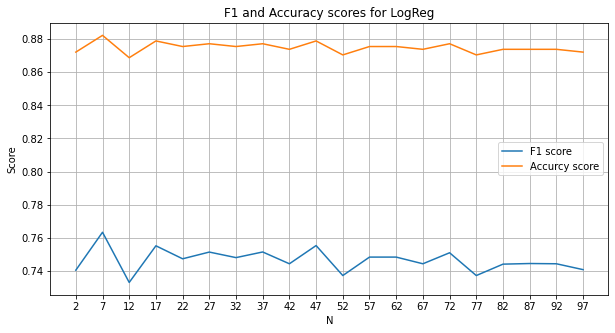

Best n: 7
Best F1 score: 0.76349
Best accuracy score: 0.88215


In [28]:
plot_f1_and_accuracy(n_grid_param, logreg_f1_scores, logreg_accuracy_scores, 'LogReg')
logreg_best_n = get_best_model_N(n_grid_param, logreg_f1_scores, logreg_accuracy_scores)

In [29]:
tree_f1_scores = []
tree_accuracy_scores = []
all_tree_proba_preds = bagging_models_proba_predictions(tree_bagging_model, X_test)

for n in n_grid_param:
    n_tree_preds = get_random_k_predictions(all_tree_proba_preds, n)
    mean_f1, mean_accuracy = one_vs_all_score(n_tree_preds, y_test)
    tree_f1_scores.append(mean_f1)
    tree_accuracy_scores.append(mean_accuracy)

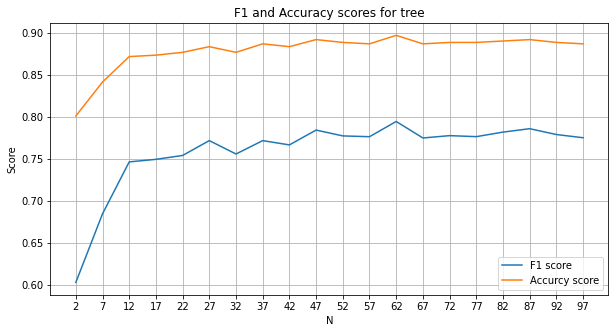

Best n: 62
Best F1 score: 0.79482
Best accuracy score: 0.89731


In [30]:
plot_f1_and_accuracy(n_grid_param, tree_f1_scores, tree_accuracy_scores, 'tree')
tree_best_n = get_best_model_N(n_grid_param, tree_f1_scores, tree_accuracy_scores)

Таким образом, выше найдены оптимальные значения `N` для логистической регрессии и ансамбля деревьев.

#### End of my code

---

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

---

#### My code

In [31]:
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

N_MAX = 100

forest_params = {
    'random_state': 42,
    'n_estimators': None,
}
forest_f1_scores = []
forest_accuracy_scores = []
n_grid_param = list(range(1, N_MAX + 1))

for i in tqdm(n_grid_param):
    forest_params['n_estimators'] = i
    forest_model = RandomForestClassifier(**forest_params)
    forest_model.fit(X_train, y_train)
    forest_pred = forest_model.predict(X_test)
    mean_f1, mean_accuracy = one_vs_all_score(forest_pred, y_test)
    forest_f1_scores.append(mean_f1)
    forest_accuracy_scores.append(mean_accuracy)
    
forest_best_f1_id = np.argmax(forest_f1_scores)
forest_best_accuracy_id = np.argmax(forest_accuracy_scores)
forest_best_f1_score = forest_f1_scores[forest_best_f1_id]
forest_best_accuracy_score = forest_accuracy_scores[forest_best_accuracy_id]
forest_best_n = None

forest_best_n = forest_best_f1_id + 1

print(f'Forest best n: {forest_best_n}')
print('Forest best F1 score: {:0.5}'.format(forest_best_f1_score))
print('Forest best accuracy score: {:0.5}'.format(forest_best_accuracy_score))

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 16.43it/s]

Forest best n: 77
Forest best F1 score: 0.7522
Forest best accuracy score: 0.87879


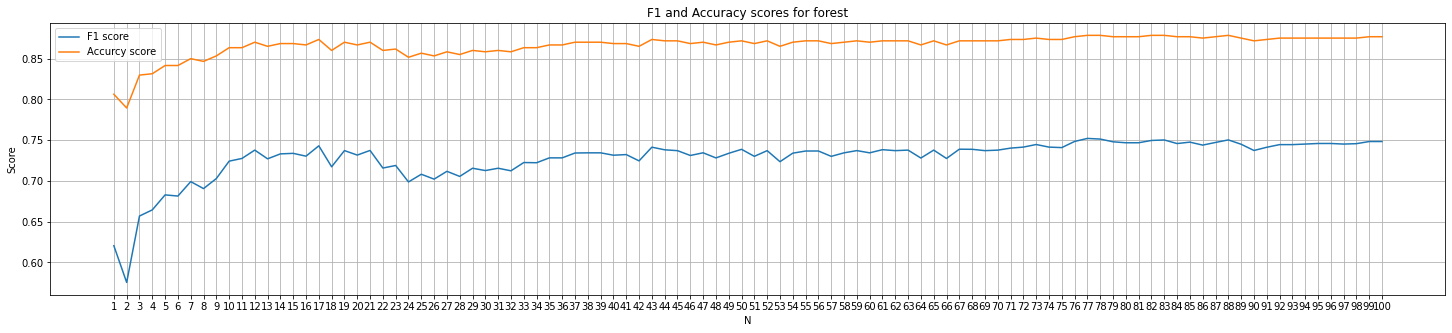

Best n: 77
Best F1 score: 0.7522
Best accuracy score: 0.87879


In [32]:
plot_f1_and_accuracy(n_grid_param, forest_f1_scores, forest_accuracy_scores, 'forest', figsize=(25, 5))
forest_best_n = get_best_model_N(n_grid_param, forest_f1_scores, forest_accuracy_scores)

#### End of my code

---

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

---

#### My code

Если я правильно плнял задание, то зависимость необходимо стоить используя сами модели без бэггига

In [33]:
tree_params = {
    'random_state': 42,
    'max_depth': best_depth,
}
logreg_params = {
    'multi_class': 'multinomial',
    'solver': 'saga',
    'tol': 1e-3,
    'max_iter': 500,
    'penalty': 'elasticnet',
    'l1_ratio': best_l1_ratio,
    'verbose': False,
    'random_state': 42,
}
forest_params = {
    'random_state': 42,
    'n_estimators': forest_best_n,
}

print(f'Best l1_ratio: {best_l1_ratio}')
print(f'Best tree depth: {best_depth}')

Best l1_ratio: 0
Best tree depth: 15


In [34]:
skf = StratifiedKFold(
    n_splits=10,
    shuffle=True,
    random_state=42,
)
concated_ids = []
logreg_f1_scores = []
logreg_accuracy_scores = []
tree_f1_scores = []
tree_accuracy_scores = []
forest_f1_scores = []
forest_accuracy_scores = []

for _, train_ids in skf.split(X_train, y_train):
    concated_ids += list(train_ids)
    k_X_train = X_train[concated_ids]
    k_y_train = y_train[concated_ids]
    
    logreg_model = create_pipe_with_logreg_param(**logreg_params)
    tree_model = create_pipe_with_tree_param(**tree_params)
    forest_model = RandomForestClassifier(**forest_params)
    
    logreg_model.fit(k_X_train, k_y_train)
    tree_model.fit(k_X_train, k_y_train)
    forest_model.fit(k_X_train, k_y_train)
    
    logreg_y_pred = logreg_model.predict(X_test)
    tree_y_pred = tree_model.predict(X_test)
    forest_y_pred = forest_model.predict(X_test)
    
    logreg_f1, logreg_accuracy = one_vs_all_score(logreg_y_pred, y_test)
    tree_f1, tree_accuracy = one_vs_all_score(tree_y_pred, y_test)
    forest_f1, forest_accuracy = one_vs_all_score(forest_y_pred, y_test)
    
    logreg_f1_scores.append(logreg_f1)
    logreg_accuracy_scores.append(logreg_accuracy)
    tree_f1_scores.append(tree_f1)
    tree_accuracy_scores.append(tree_accuracy)
    forest_f1_scores.append(forest_f1)
    forest_accuracy_scores.append(forest_accuracy)

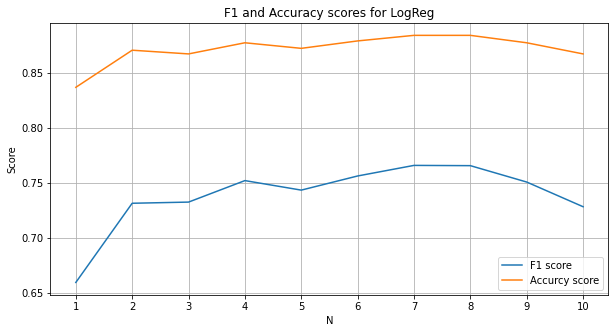

Best LogReg F1: 0.76589
Best LogReg Accuracy: 0.88384


In [35]:
plot_f1_and_accuracy(list(range(1, 11)), logreg_f1_scores, logreg_accuracy_scores, 'LogReg')
print('Best LogReg F1: {:0.5}'.format(np.max(logreg_f1_scores)))
print('Best LogReg Accuracy: {:0.5}'.format(np.max(logreg_accuracy_scores)))

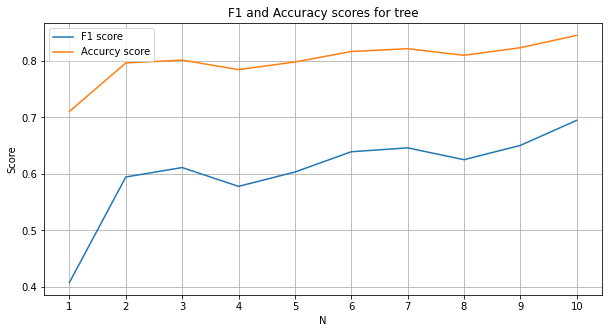

Best Tree F1: 0.69471
Best Tree Accuracy: 0.84512


In [36]:
plot_f1_and_accuracy(list(range(1, 11)), tree_f1_scores, tree_accuracy_scores, 'tree')
print('Best Tree F1: {:0.5}'.format(np.max(tree_f1_scores)))
print('Best Tree Accuracy: {:0.5}'.format(np.max(tree_accuracy_scores)))

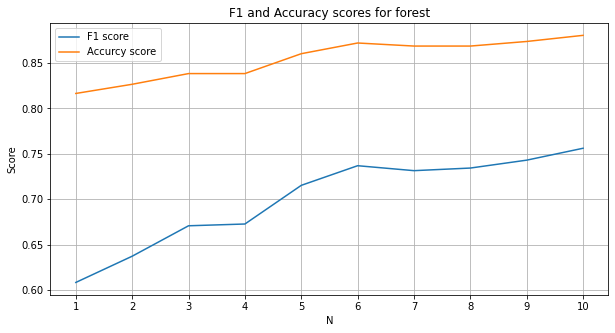

Best Forest F1: 0.75616
Best Forest Accuracy: 0.88047


In [37]:
plot_f1_and_accuracy(list(range(1, 11)), forest_f1_scores, forest_accuracy_scores, 'forest')
print('Best Forest F1: {:0.5}'.format(np.max(forest_f1_scores)))
print('Best Forest Accuracy: {:0.5}'.format(np.max(forest_accuracy_scores)))

Из представленных выше графиков можно сделать довольно очевидный вывод: чем больше данных используется для обучения, тем выше качество модели.

Второй вывод: исходя из графиков выше, LogisticRegression показал лучшие результаты в сравнение с RandomForest и DecisionTree.